In [36]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pathlib


In [37]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [38]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [39]:
len(dataset)  

68

In [ ]:
#becasuse every image in dataset is a batch of 32 images i.e 2156/32

In [40]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())     #every elemnt we get is tensor so u need to convert into numpy

(32, 256, 256, 3)
[1 1 0 1 0 2 1 0 0 1 0 1 1 0 1 1 1 2 1 0 0 0 2 0 1 1 0 1 0 1 0 1]


In [41]:
# 32, 256,256,3
#32= batch of 32 immages
#256,256 is size of image
#3= RGB channels

In [42]:
#SHAPE OF FIRST IMAGE
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


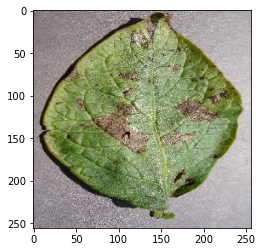

In [43]:
#visualising 1st image
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))


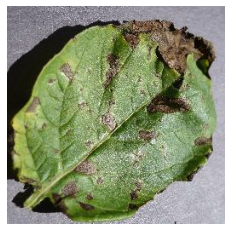

In [44]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

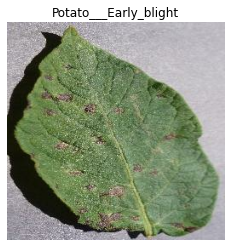

In [11]:
#to display the label of image
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]]) #this will return numbers so we will supply classname and index label to it
    plt.axis("off")

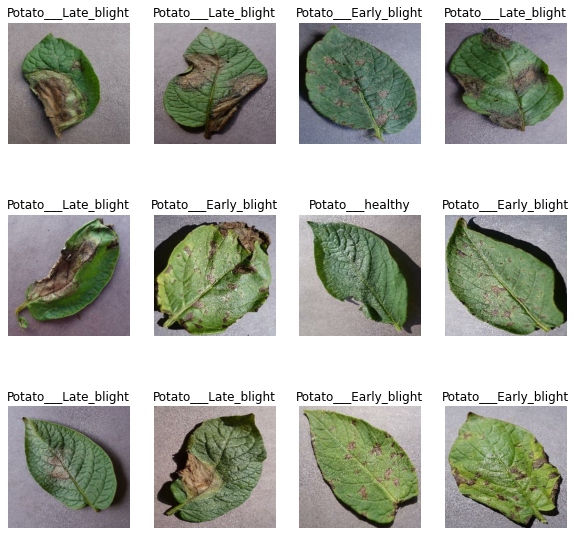

In [45]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]]) #this will return numbers so we will supply classname and index label to it
        plt.axis("off")

In [46]:
len(dataset)

68

In [47]:
#train test split
#80:20
#20%- 10% validation, 10%test
EPOCHS=15
#AT THE end of every epoch we make use of validation , once all epochs are done then we use 10%test for deploying model accuracy

In [48]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [49]:
train_ds=dataset.take(54)
len(train_ds)

54

In [50]:
test_ds=dataset.skip(54) # similar to arr[54:]
len(test_ds)   #this is total test data of 20%

14

In [51]:
#splitting 10%of validation data
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [52]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [53]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [54]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [55]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [56]:
len(train_ds)

54

In [57]:
len(val_ds)

6

In [58]:
len(test_ds)

8

In [59]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  

In [60]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [61]:
#data augementation
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [62]:
#cnn=convolusional neural network

In [63]:
# Creating Convolution layer 
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'softmax'),
])

model.build(input_shape = input_shape)

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [64]:
# Optimizing the model 'SparseCategoricalCrossentropy'=>as there are many categorical classes of data
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), 
    metrics = ['accuracy'])

In [65]:
#Fit the model with training data and also pass validation data
history = model.fit(
train_ds, epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = 1, validation_data = val_ds)

Epoch 1/15
54/54 [==============================] - 192s 3s/step - loss: 1.2295 - accuracy: 0.4745 - val_loss: 0.9319 - val_accuracy: 0.4844
Epoch 2/15
54/54 [==============================] - 171s 3s/step - loss: 0.8762 - accuracy: 0.5469 - val_loss: 0.8537 - val_accuracy: 0.5365
Epoch 3/15
54/54 [==============================] - 173s 3s/step - loss: 0.6962 - accuracy: 0.6985 - val_loss: 0.6607 - val_accuracy: 0.7135
Epoch 4/15
54/54 [==============================] - 174s 3s/step - loss: 0.5308 - accuracy: 0.7697 - val_loss: 0.4045 - val_accuracy: 0.8125
Epoch 5/15
54/54 [==============================] - 169s 3s/step - loss: 0.3043 - accuracy: 0.8698 - val_loss: 0.2339 - val_accuracy: 0.8906
Epoch 6/15
54/54 [==============================] - 169s 3s/step - loss: 0.2428 - accuracy: 0.8981 - val_loss: 0.2432 - val_accuracy: 0.9271
Epoch 7/15
54/54 [==============================] - 168s 3s/step - loss: 0.2088 - accuracy: 0.9196 - val_loss: 0.2502 - val_accuracy: 0.9115
Epoch 8/15
54

In [66]:
scores = model.evaluate(train_ds)

54/54 [==============================] - 42s 787ms/step - loss: 0.1196 - accuracy: 0.9508


In [67]:
scores1 = model.evaluate(test_ds)

8/8 [==============================] - 12s 803ms/step - loss: 0.1452 - accuracy: 0.9297


In [68]:
scores2 = model.evaluate(val_ds)

6/6 [==============================] - 8s 1s/step - loss: 0.1486 - accuracy: 0.9479


In [69]:
history

In [70]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 54}

In [71]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [72]:
#ANALYSING OUTPUT

In [73]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']


Text(0.5, 1.0, 'Training and Validation Loss')

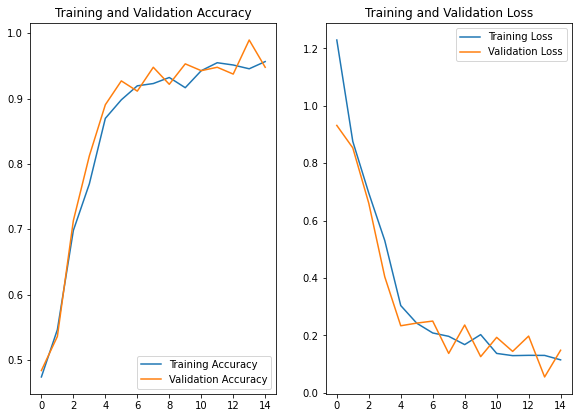

In [74]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

First Image of batch to predict :
Actual label :  Potato___Early_blight
1/1 [==============================] - 2s 2s/step
Predicted label :  Potato___Early_blight


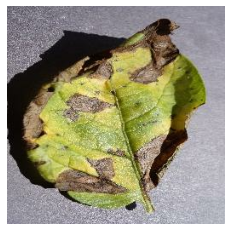

In [75]:
#plotting image
for batch_image, batch_label in train_ds.take(1):
    first_image = batch_image[0].numpy().astype('uint8')
    first_label = class_names[batch_label[0]]
    
    print('First Image of batch to predict :')
    plt.imshow(first_image)
    print('Actual label : ', first_label)
    
    batch_prediction = model.predict(batch_image)
    print('Predicted label : ', class_names[np.argmax(batch_prediction[0])])
    plt.axis('off')

1/1 [==============================] - 1s 828ms/step


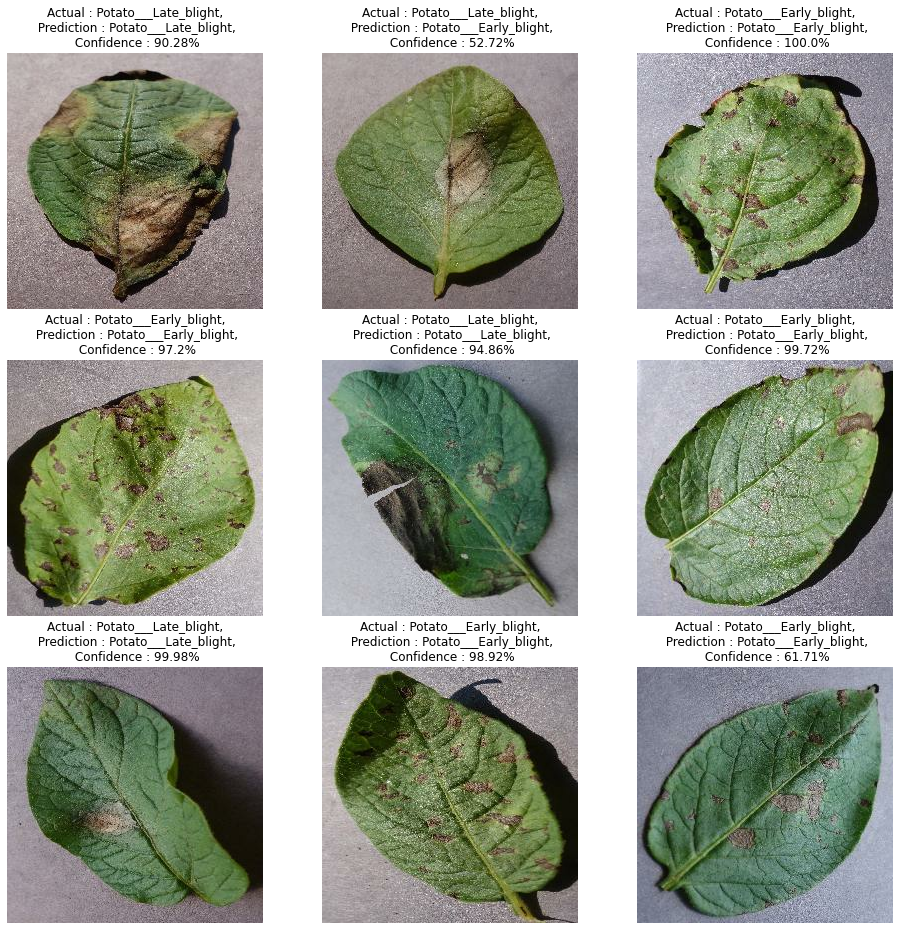

In [76]:
# plotting batch of images with its actual label, predicted label and confidence
plt.figure(figsize = (16,16))
for batch_image, batch_label in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_names[batch_label[i]]
    
        plt.imshow(image)
    
        batch_prediction = model.predict(batch_image)
        predicted_class = class_names[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')
    
        plt.axis('off')

In [79]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [82]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [83]:
import os
os.listdir("../models")

['1', '2']

In [84]:
import os
max([int(i) for i in os.listdir("../models")])

2

In [85]:
import os
max([int(i) for i in os.listdir("../models")])+1

3

In [86]:
import os
model_version=max([int(i) for i in os.listdir("../models")])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/3\assets
